In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

# Import seeds dataset
seed_data = pd.read_table('seeds_dataset.txt', sep="\t",on_bad_lines='skip')

# set the column names
seed_data.columns = ["area", "parimeter", "compactness", "length_of_kernal", "width_of_kernal", "asymmetry", 
                "length_of_kernel_groove", "type"]

# compactness contains one nan value
seed_data['compactness'] = seed_data['compactness'].fillna(0)

# set the input variables
independent_variables = seed_data[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
dependent_variables = seed_data['type']

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(independent_variables, dependent_variables, test_size=.5, random_state=5)

In [2]:
# Create logistic regression Classification_model and fit X_train and Y_train
Classification_model = LogisticRegression()
Classification_model.fit(X_train, Y_train)

# predict target value
Y_Pred = Classification_model.predict(X_test)

# print the accuracy of our Classification_model
score = Classification_model.score(X_test, Y_test)
print("accuracy = ", score)

# predict the type with the values for area, length_of_kernal, width_of_kernal, asymmetry, length_of_kernel_groove
predictedType = Classification_model.predict([[19.3, 6.3, 3.8 , 3.4, 6.2]])

# type of seeds 1 = Kama, 2 = Rosa, 3 = Canadian
print('The predicted type is ', predictedType)

accuracy =  0.9090909090909091
The predicted type is  [2]


Text(0.5, 1.0, 'Logistic Regression Decision Region Boundary')

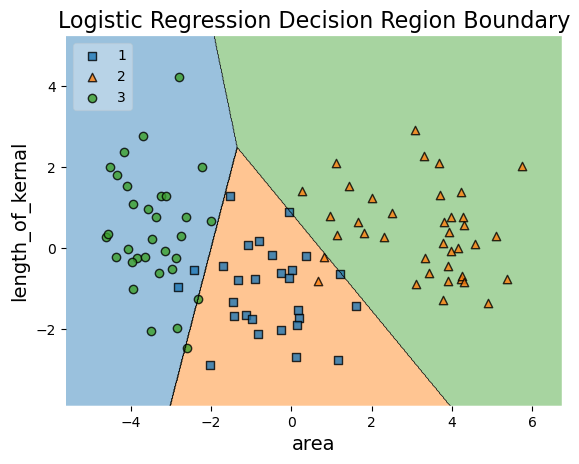

In [3]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
clf = Classification_model
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, Y_train)
plot_decision_regions(X_train2, Y_train.values, clf=clf, legend=2)

plt.xlabel(independent_variables.columns[0], size=14)
plt.ylabel(independent_variables.columns[1], size=14)
plt.title('Logistic Regression Decision Region Boundary', size=16)

### Assignment 2

In [4]:
# Randomization 
percentage = 0.5
import random

def randomize_dataframe(df, percentage):
    """
    Randomizes a percentage of the cells in the given DataFrame.
    
    Args:
    df (pandas.DataFrame): The DataFrame to be randomized.
    percentage (float): The percentage of cells to randomize.
    
    Returns:
    pandas.DataFrame: The randomized DataFrame.
    """
    num_rows, num_cols = df.shape
    num_to_randomize = int(num_rows * num_cols * percentage)  # Calculate the number of cells to randomize
    cells_to_randomize = random.sample(list(df.stack().index), num_to_randomize)  # Select a random subset of cells to randomize
    for cell in cells_to_randomize:
        df.at[cell] = random.random()  # Randomize the cell value
    
    return df


In [5]:
random_independent_variables = randomize_dataframe(independent_variables, percentage)
# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(independent_variables, dependent_variables, test_size=.5, random_state=5)

In [6]:
# Create logistic regression Classification_model and fit X_train and Y_train
Classification_model = LogisticRegression()
Classification_model.fit(X_train, Y_train)

# predict target value
Y_Pred = Classification_model.predict(X_test)

# print the accuracy of our Classification_model
score = Classification_model.score(X_test, Y_test)
print("accuracy = ", score)

# predict the type with the values for area, length_of_kernal, width_of_kernal, asymmetry, length_of_kernel_groove
predictedType = Classification_model.predict([[19.3, 6.3, 3.8 , 3.4, 6.2]])

# type of seeds 1 = Kama, 2 = Rosa, 3 = Canadian
print('The predicted type is ', predictedType)

accuracy =  0.3434343434343434
The predicted type is  [2]


### Assignment 3

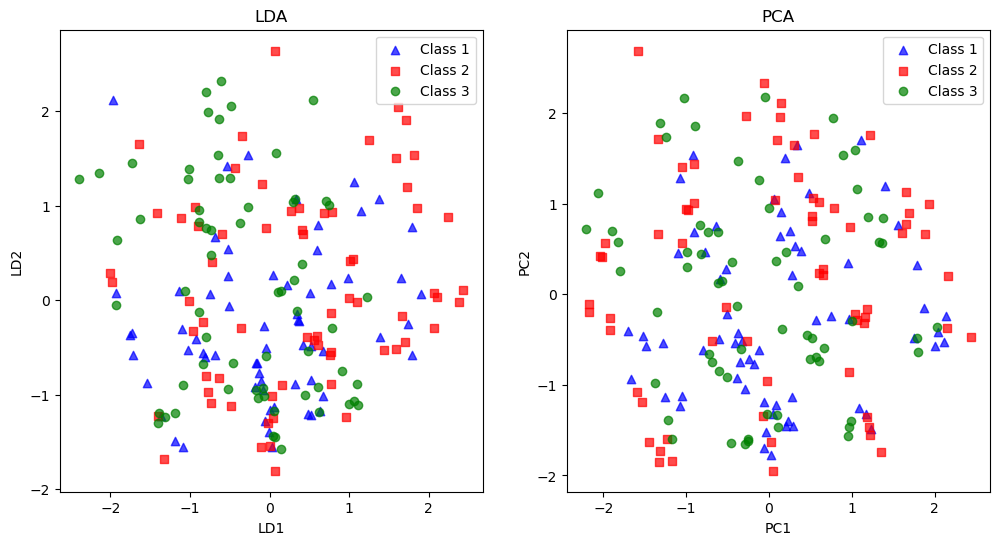

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Split the data into features (X) and labels (y)
X = independent_variables
y = dependent_variables

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_std, y)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the LDA results
for label, marker, color in zip(
    range(1, 4), ('^', 's', 'o'), ('blue', 'red', 'green')):
    ax1.scatter(x=X_lda[:, 0][y == label],
                y=X_lda[:, 1][y == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label=f'Class {label}')
ax1.set_xlabel('LD1')
ax1.set_ylabel('LD2')
ax1.legend(loc='best')
ax1.set_title('LDA')

# Plot the PCA results
for label, marker, color in zip(
    range(1, 4), ('^', 's', 'o'), ('blue', 'red', 'green')):
    ax2.scatter(x=X_pca[:, 0][y == label],
                y=X_pca[:, 1][y == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label=f'Class {label}')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend(loc='best')
ax2.set_title('PCA')

plt.show()


PCA is an unsupervised dimensionality reduction technique that seeks to find the linear combinations of features that capture the maximum variance in the dataset. In the case of the Wheat Seeds dataset, we applied PCA to reduce the dimensionality from 7 features to 2 principal components.

The scatter plot of the PCA results shows that the three classes of wheat seeds overlap significantly in the 2D space of the principal components. This means that the two principal components are not able to capture the main variations in the dataset that differentiate the three classes of wheat seeds.

Overall, the LDA results are more informative for classification purposes, as the classes are well-separated in the 2D space of the linear discriminants. In contrast, the PCA results are more useful for visualization and exploratory data analysis, as they reveal the overall patterns of variation in the dataset, but do not provide clear boundaries between the classes.